# Import necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from urllib.parse import urlparse

# Load your dataset


In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')


### Check for email addresses as publisher names and extract domains if present


In [3]:
def extract_domain(publisher):
    if "@" in publisher:
        return publisher.split("@")[1].split('.')[0]  # Extract domain name without TLD
    else:
        return publisher

df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Analyze top publishers by frequency


In [4]:
top_publishers = df['publisher_domain'].value_counts().head(10)


# Visualizing the top publishers


C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_27248\1574655428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


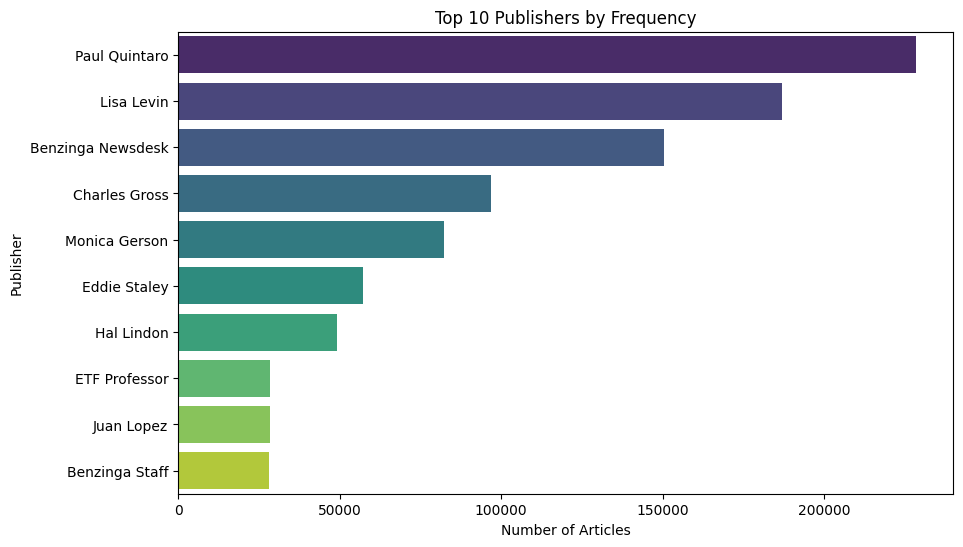

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Publishers by Frequency')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

### Example of creating a 'news_type' column based on certain keywords (if applicable)


In [9]:
df['news_type'] = df['headline'].apply(lambda x: 'Finance' if 'market' in x.lower() else 'Other')


### Then, proceed with the original analysis


In [10]:
news_by_publisher = df.groupby(['publisher_domain', 'news_type']).size().unstack().fillna(0)


# Visualize the difference in the type of news reported


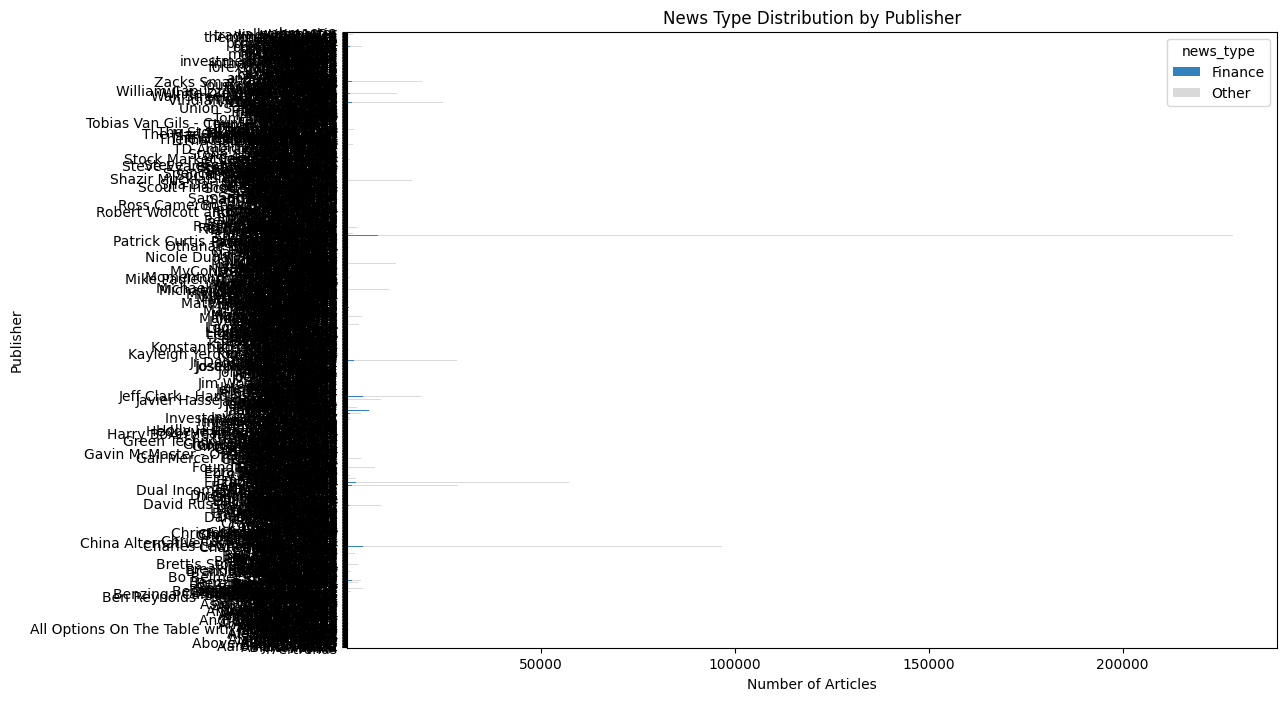

In [12]:
news_by_publisher.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title('News Type Distribution by Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

# For domain-specific analysis


In [8]:
domain_count = df['publisher_domain'].value_counts()
print("Unique domains and their frequency:")
print(domain_count)

Unique domains and their frequency:
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Mark Davis                1
janaviktoria              1
Kiana Danial              1
giovannimola              1
Jeremie Capron            1
Name: count, Length: 1024, dtype: int64
